### Define file path

In [1]:
# ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï
import pandas as pd
import os

# PC filepath ÏÑ§Ï†ï
BASE_FILEPATH = "/home/songmu/"
# BASE_FILEPATH = "/home/widen/"

# ÏÇ¨Ïö©Ìï† client Î∞è server filepath ÏÑ§Ï†ï(Ïó∞, Ïõî, Ïùº, Ïãú)
CLIENT_FILEPATH = BASE_FILEPATH + "multipath/client/logs/2025_02_17_14_14/"
SERVER_FILEPATH = BASE_FILEPATH + "multipath/server/logs/2025_02_17_13_57/"

# Ìå®ÌÇ∑ ÏàòÏã†Ïãú Ìå®ÌÇ∑ Ï†ïÎ≥¥ logging Ìï¥Îëî filepath
KT_LOG_FILEPATH = SERVER_FILEPATH + "kt_log.csv"
LG_LOG_FILEPATH = SERVER_FILEPATH + "lg_log.csv"
# ÏúÑ KT, LG Î•º Ïù¥Ïö©ÌïòÏó¨ ÎßåÎì§Ïñ¥Ï§Ñ Combine trafficÏùò Ï†ÄÏû• Í≤ΩÎ°ú
COMBINE_LOG_FILEPATH = SERVER_FILEPATH + "combine_log.csv"

# ÏÜ°Ïã†Ï∏°Ïùò Ìå®ÌÇ∑ Ï†ïÎ≥¥ logging Ìï¥Îëî filepath
SENDING_LOG_FILEPATH = CLIENT_FILEPATH + "logs/packet_log.csv"

# ÏÉùÏÑ±Ìïú Í∑∏ÎûòÌîÑÎì§ Ï†ÄÏû•Ìï† filepath
GRAPH_PATH = SERVER_FILEPATH + "graphs"
os.makedirs(GRAPH_PATH, exist_ok = True)

# ÏÉùÏÑ±Ìï† frames Ï†ÄÏû•Ìï† filepath
FRAMES_FILEPATH = SERVER_FILEPATH + "frames"

### Make combine_log.csv

In [2]:
import pandas as pdBASE_FILEPATH = "/home/songmu/"

# Read csv files
kt_log_df = pd.read_csv(KT_LOG_FILEPATH, index_col = None)
lg_log_df = pd.read_csv(LG_LOG_FILEPATH, index_col = None)
sending_log_df = pd.read_csv(SENDING_LOG_FILEPATH, index_col = None)

# Îëê Í∞úÏùò DataFrameÏùÑ sequence_number Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï© (outer join, ÏñëÏ™Ω Î™®ÎëêÏóê Ï°¥Ïû¨ÌïòÎäî ÌñâÏùÑ Ìè¨Ìï®)
merged_df = pd.merge(kt_log_df, lg_log_df, on="sequence_number", how="outer", suffixes=('_kt', '_lg'))

# Îπà Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
combined_data = []

# Í∞ôÏùÄ sequence_numberÏóêÏÑú latencyÍ∞Ä Ï†ÅÏùÄ rowÎ•º ÏÑ†ÌÉùÌïòÍ≥†, ÎßàÏßÄÎßâ columnÏóê kt ÎòêÎäî lg Ï∂îÍ∞Ä
for index, row in merged_df.iterrows():
    if pd.isna(row['network_latency_ms_kt']):  # KT Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏùÑ Í≤ΩÏö∞ LG Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÍ≥† 'lg'Î•º Ï∂îÍ∞Ä
        combined_data.append([row['source_ip_lg'], row['sequence_number'], row['timestamp_frame_lg'], row['timestamp_sending_lg'], row['received_time_lg'], row['network_latency_ms_lg'], row['message_size_lg'], 'lg'])
    elif pd.isna(row['network_latency_ms_lg']):  # LG Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏùÑ Í≤ΩÏö∞ KT Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÍ≥† 'kt'Î•º Ï∂îÍ∞Ä
        combined_data.append([row['source_ip_kt'], row['sequence_number'], row['timestamp_frame_kt'], row['timestamp_sending_kt'], row['received_time_kt'], row['network_latency_ms_kt'], row['message_size_lg'], 'kt'])
    else:
        # Îëê row Ï§ë latencyÍ∞Ä Îçî ÏûëÏùÄ Í≤ÉÏùÑ ÏÑ†ÌÉùÌïòÍ≥† Í∑∏Ïóê ÎßûÎäî label Ï∂îÍ∞Ä
        if row['network_latency_ms_kt'] < row['network_latency_ms_lg']:
            combined_data.append([row['source_ip_kt'], row['sequence_number'], row['timestamp_frame_kt'], row['timestamp_sending_kt'], row['received_time_kt'], row['network_latency_ms_kt'], row['message_size_kt'], 'kt'])
        else:
            combined_data.append([row['source_ip_lg'], row['sequence_number'], row['timestamp_frame_lg'], row['timestamp_sending_lg'], row['received_time_lg'], row['network_latency_ms_lg'], row['message_size_kt'], 'lg'])

# Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò
combined_log_df = pd.DataFrame(combined_data, columns= ["source_ip", "sequence_number", "timestamp_frame", "timestamp_sending", "received_time", "network_latency_ms", "message_size", "source"])
combined_log_df.to_csv(COMBINE_LOG_FILEPATH, index=False, header=True)

print(f"Í≤∞Í≥º ÌååÏùºÏù¥ {COMBINE_LOG_FILEPATH}Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

Í≤∞Í≥º ÌååÏùºÏù¥ /home/songmu/multipath/server/logs/2025_02_17_13_57/combine_log.csvÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


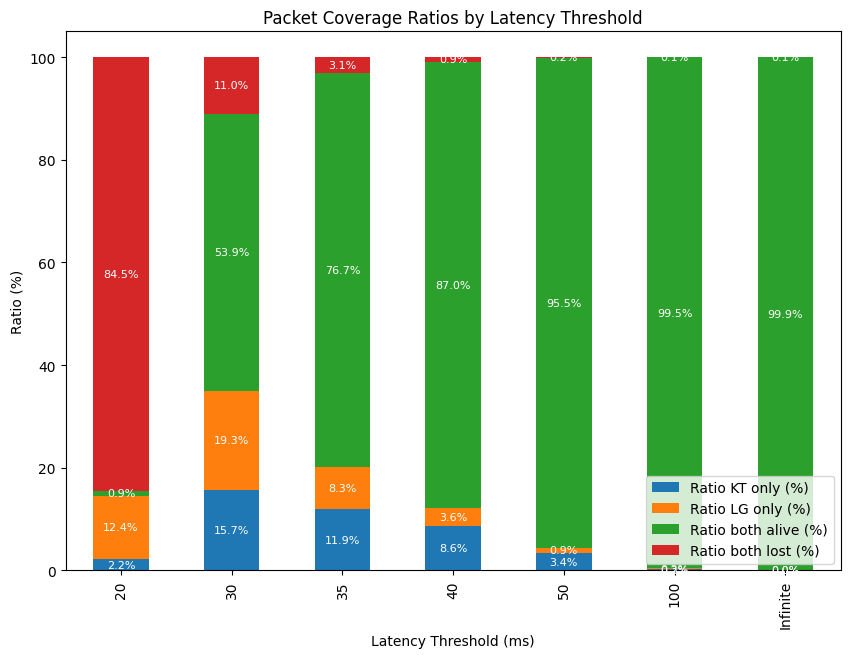

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV ÌååÏùº ÏùΩÍ∏∞
kt_log_df = pd.read_csv(KT_LOG_FILEPATH, index_col=None)
lg_log_df = pd.read_csv(LG_LOG_FILEPATH, index_col=None)
sending_log_df = pd.read_csv(SENDING_LOG_FILEPATH, index_col=None)

# kt_log_dfÏôÄ lg_log_dfÏùò Ïª¨ÎüºÎ™ÖÏóê Ï†ëÎØ∏ÏÇ¨ Ï∂îÍ∞Ä (Îã®, 'sequence number'Îäî Ï†úÏô∏)
kt_log_df.rename(columns=lambda x: x + '_kt' if x != 'sequence_number' else x, inplace=True)
lg_log_df.rename(columns=lambda x: x + '_lg' if x != 'sequence_number' else x, inplace=True)

# sending_log_dfÎ•º Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
merged_df = pd.merge(sending_log_df, kt_log_df, on="sequence_number", how="left")
merged_df = pd.merge(merged_df, lg_log_df, on="sequence_number", how="left")

# latency ÏûÑÍ≥ÑÍ∞í Î¶¨Ïä§Ìä∏
thresholds = [20, 30, 35, 40, 50, 100, float('inf')]

# Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
results = []

for threshold in thresholds:
    # Í∞Å Í≤ΩÏö∞Ïóê ÎåÄÌïú Ïπ¥Ïö¥Ìä∏ Ï¥àÍ∏∞Ìôî
    count_kt_only = 0
    count_lg_only = 0
    count_both_alive = 0
    count_both_lost = 0

    # Í∞Å ÌñâÏóê ÎåÄÌï¥ Ìå®ÌÇ∑Ïùò ÏÉÅÌÉúÎ•º ÌåêÎã®
    for index, row in merged_df.iterrows():
        # KTÏôÄ LGÏùò latency Í∞í Í∞ÄÏ†∏Ïò§Í∏∞
        kt_latency = row.get('network_latency_ms_kt')
        lg_latency = row.get('network_latency_ms_lg')

        # Ìå®ÌÇ∑Ïùò Ï°¥Ïû¨ Ïó¨Î∂Ä ÌåêÎã®
        alive_kt = pd.notna(kt_latency) and kt_latency <= threshold
        alive_lg = pd.notna(lg_latency) and lg_latency <= threshold

        # Í∞Å Í≤ΩÏö∞Ïóê Îî∞Îùº Ïπ¥Ïö¥Ìä∏ Ï¶ùÍ∞Ä
        if alive_kt and not alive_lg:
            count_kt_only += 1
        elif alive_lg and not alive_kt:
            count_lg_only += 1
        elif alive_kt and alive_lg:
            count_both_alive += 1
        else:
            count_both_lost += 1

    # Ï¥ù Ìå®ÌÇ∑ Ïàò Í≥ÑÏÇ∞
    total_packets = count_kt_only + count_lg_only + count_both_alive + count_both_lost

    # 'both lost'Î•º Ï†úÏô∏Ìïú Ï¥ù Ìå®ÌÇ∑ Ïàò
    total_excl_both_lost = total_packets - count_both_lost

    # 'both lost'ÏôÄ 'both alive'Î•º Ï†úÏô∏Ìïú Ï¥ù Ìå®ÌÇ∑ Ïàò
    total_excl_both_lost_and_both_alive = total_packets - count_both_lost - count_both_alive

    # Í∞Å Í≤ΩÏö∞Ïóê ÎåÄÌïú ÎπÑÏú® Í≥ÑÏÇ∞ (ÌçºÏÑºÌä∏ ÌòïÌÉú)
    ratio_kt_only = (count_kt_only / total_packets * 100) if total_packets > 0 else 0
    ratio_lg_only = (count_lg_only / total_packets * 100) if total_packets > 0 else 0
    ratio_both_alive = (count_both_alive / total_packets * 100) if total_packets > 0 else 0
    ratio_both_lost = (count_both_lost / total_packets * 100) if total_packets > 0 else 0

    # 'both lost'Î•º Ï†úÏô∏Ìïú ÎπÑÏú® Í≥ÑÏÇ∞
    ratio_kt_only_excl_both_lost = (count_kt_only / total_excl_both_lost * 100) if total_excl_both_lost > 0 else 0
    ratio_lg_only_excl_both_lost = (count_lg_only / total_excl_both_lost * 100) if total_excl_both_lost > 0 else 0
    ratio_both_alive_excl_both_lost = (count_both_alive / total_excl_both_lost * 100) if total_excl_both_lost > 0 else 0

    # 'both lost'ÏôÄ 'both alive'Î•º Ï†úÏô∏Ìïú ÎπÑÏú® Í≥ÑÏÇ∞
    ratio_kt_only_excl_both_lost_and_both_alive = (count_kt_only / total_excl_both_lost_and_both_alive * 100) if total_excl_both_lost_and_both_alive > 0 else 0
    ratio_lg_only_excl_both_lost_and_both_alive = (count_lg_only / total_excl_both_lost_and_both_alive * 100) if total_excl_both_lost_and_both_alive > 0 else 0

    # Í≤∞Í≥º Ï†ÄÏû•
    results.append({
        'Latency Threshold (ms)': threshold if threshold != float('inf') else 'Infinite',
        'Packets covered by KT only': count_kt_only,
        'Packets covered by LG only': count_lg_only,
        'Packets where both alive': count_both_alive,
        'Packets where both lost': count_both_lost,
        'Total Packets': total_packets,
        'Ratio KT only (%)': f"{ratio_kt_only:.2f}%",
        'Ratio LG only (%)': f"{ratio_lg_only:.2f}%",
        'Ratio both alive (%)': f"{ratio_both_alive:.2f}%",
        'Ratio both lost (%)': f"{ratio_both_lost:.2f}%",
        'Ratio KT only (excluding both lost) (%)': f"{ratio_kt_only_excl_both_lost:.2f}%",
        'Ratio LG only (excluding both lost) (%)': f"{ratio_lg_only_excl_both_lost:.2f}%",
        'Ratio both alive (excluding both lost) (%)': f"{ratio_both_alive_excl_both_lost:.2f}%",
        'Ratio KT only (excluding both lost and both alive) (%)': f"{ratio_kt_only_excl_both_lost_and_both_alive:.2f}%",
        'Ratio LG only (excluding both lost and both alive) (%)': f"{ratio_lg_only_excl_both_lost_and_both_alive:.2f}%"
    })

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò ÌõÑ Ï∂úÎ†•
results_df = pd.DataFrame(results)

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
threshold_labels = [str(t) if t != float('inf') else 'Infinite' for t in thresholds]

# ÎπÑÏú® Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù
ratio_columns = ['Ratio KT only (%)', 'Ratio LG only (%)', 'Ratio both alive (%)', 'Ratio both lost (%)']
ratio_df = results_df[ratio_columns].copy()
ratio_df.index = threshold_labels

# ÎπÑÏú® Í∞íÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò
for col in ratio_columns:
    ratio_df[col] = ratio_df[col].str.rstrip('%').astype(float)

# Ïä§ÌÉùÌòï ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
ax = ratio_df.plot(kind='bar', stacked=True, figsize=(10, 7))

# Í∞Å Î∞îÏóê Î†àÏù¥Î∏î Ï∂îÍ∞Ä
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', color='white', fontsize=8)

plt.xlabel('Latency Threshold (ms)')
plt.ylabel('Ratio (%)')
plt.title('Packet Coverage Ratios by Latency Threshold')
plt.legend(loc='best')
plt.savefig(f'{GRAPH_PATH}/Packet_coverage_ratio.png')
plt.show()


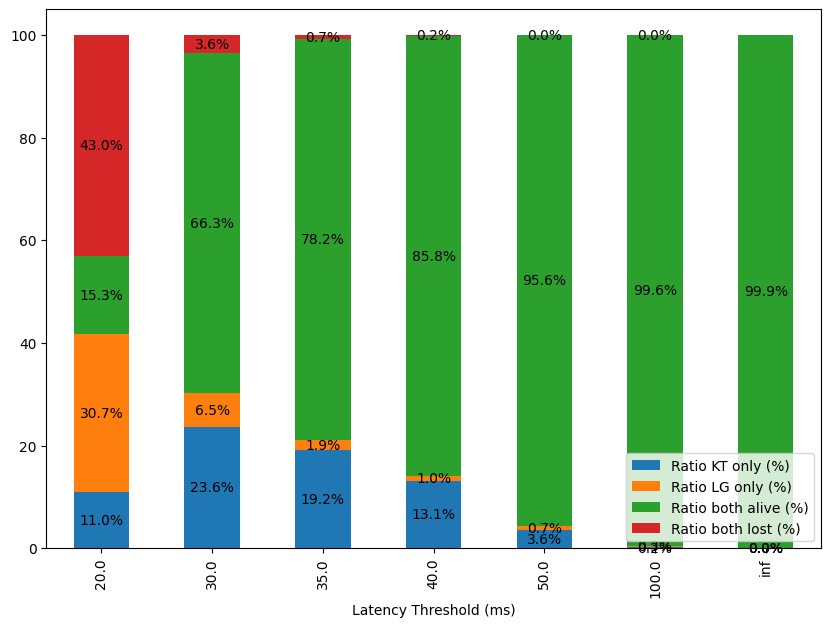

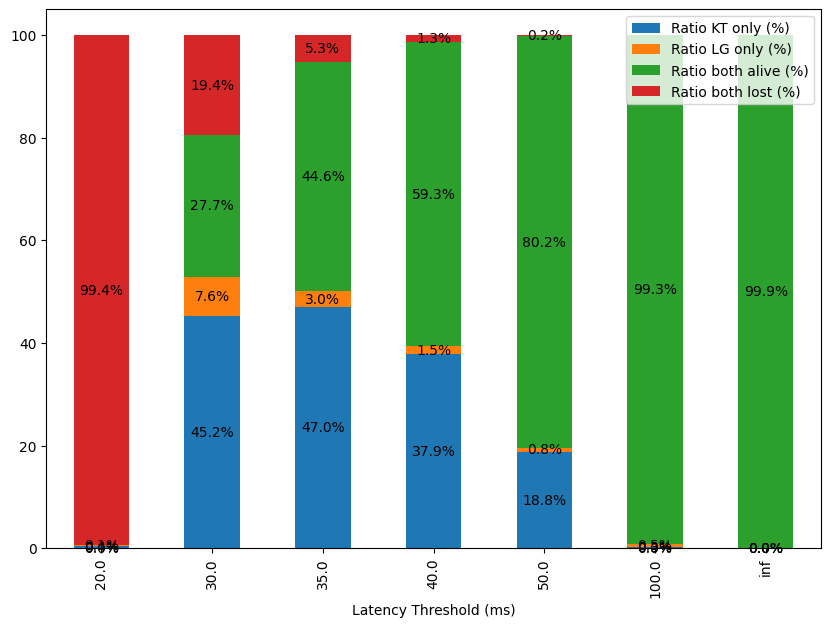

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# CSV ÌååÏùº ÏùΩÍ∏∞
kt_log_df = pd.read_csv(KT_LOG_FILEPATH, index_col=None)
lg_log_df = pd.read_csv(LG_LOG_FILEPATH, index_col=None)
sending_log_df = pd.read_csv(SENDING_LOG_FILEPATH, index_col=None)

# kt_log_dfÏôÄ lg_log_dfÏùò Ïª¨ÎüºÎ™ÖÏóê Ï†ëÎØ∏ÏÇ¨ Ï∂îÍ∞Ä
kt_log_df.rename(columns=lambda x: x + '_kt' if x != 'sequence_number' else x, inplace=True)
lg_log_df.rename(columns=lambda x: x + '_lg' if x != 'sequence_number' else x, inplace=True)

# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
merged_df = pd.merge(sending_log_df, kt_log_df, on="sequence_number", how="left")
merged_df = pd.merge(merged_df, lg_log_df, on="sequence_number", how="left")

# üìò Ïïû 20000Í∞úÏôÄ Îí§ 20000Í∞úÎ°ú ÎÇòÎàÑÍ∏∞
first_20k_df = merged_df.iloc[:20000]
last_20k_df = merged_df.iloc[-20000:]

# üìò Í∑∏ÎûòÌîÑ ÏÉùÏÑ± Ìï®Ïàò
def process_and_plot(merged_df, title_suffix):
    thresholds = [20, 30, 35, 40, 50, 100, float('inf')]
    results = []

    for threshold in thresholds:
        alive_kt = (merged_df['network_latency_ms_kt'].notna()) & (merged_df['network_latency_ms_kt'] <= threshold)
        alive_lg = (merged_df['network_latency_ms_lg'].notna()) & (merged_df['network_latency_ms_lg'] <= threshold)
        
        count_kt_only = ((alive_kt) & (~alive_lg)).sum()
        count_lg_only = ((alive_lg) & (~alive_kt)).sum()
        count_both_alive = ((alive_kt) & (alive_lg)).sum()
        count_both_lost = ((~alive_kt) & (~alive_lg)).sum()

        total_packets = count_kt_only + count_lg_only + count_both_alive + count_both_lost
        ratio_kt_only = (count_kt_only / total_packets * 100) if total_packets > 0 else 0

        # üìò ÎπÑÏú®ÏùÑ Ïà´Ïûê Îç∞Ïù¥ÌÑ∞Î°ú Ï†ÄÏû•
        results.append({
            'Latency Threshold (ms)': threshold, 
            'Ratio KT only (%)': ratio_kt_only, 
            'Ratio LG only (%)': (count_lg_only / total_packets * 100) if total_packets > 0 else 0, 
            'Ratio both alive (%)': (count_both_alive / total_packets * 100) if total_packets > 0 else 0, 
            'Ratio both lost (%)': (count_both_lost / total_packets * 100) if total_packets > 0 else 0
        })

    results_df = pd.DataFrame(results)

    # üìò Îπà Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï≤òÎ¶¨
    if results_df.empty:
        print(f"No data available for {title_suffix}")
        return

    ratio_df = results_df.set_index('Latency Threshold (ms)')

    # üìò ÏãúÍ∞ÅÌôî ÏÉùÏÑ±
    ax = ratio_df.plot(kind='bar', stacked=True, figsize=(10, 7))

    # üìò Í∞Å ÎßâÎåÄ ÏúÑÏóê ÎπÑÏú® ÎùºÎ≤® Ï∂îÍ∞Ä (ax.bar_label ÏÇ¨Ïö©)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center')  # Ïä§ÌÉùÎêú Í∞Å ÎßâÎåÄÏùò Ï§ëÏã¨Ïóê ÎπÑÏú® Ï∂îÍ∞Ä

    # üìò Í∑∏ÎûòÌîÑ Ï†ÄÏû•
    plt.savefig(os.path.join(GRAPH_PATH, f'Packet_coverage_ratio_{title_suffix}.png'), dpi=300, bbox_inches='tight')
    plt.show()


# üìò Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
process_and_plot(first_20k_df, 'First_20000')
process_and_plot(last_20k_df, 'Last_20000')


## Plot latency

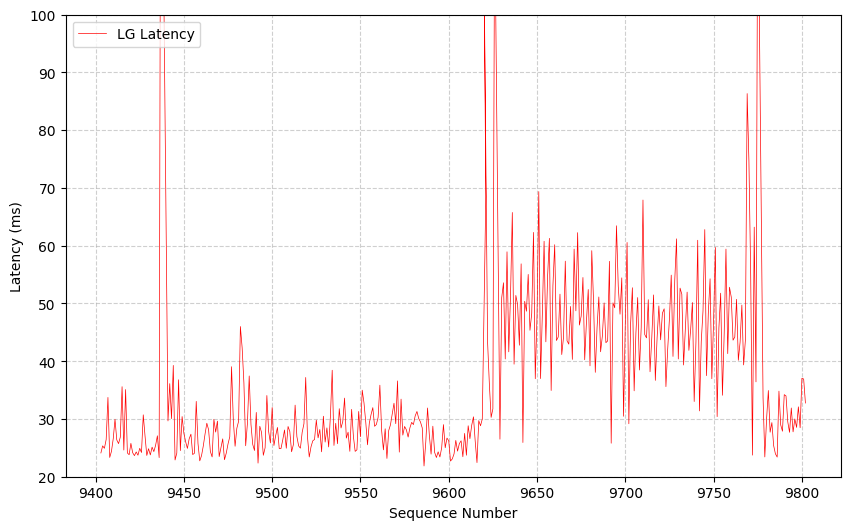

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

BASE_FILEPATH = "/home/songmu/"
SERVER_FILEPATH = BASE_FILEPATH + "multipath/server/logs/2025_02_17_13_57/"
# Ìå®ÌÇ∑ ÏàòÏã†Ïãú Ìå®ÌÇ∑ Ï†ïÎ≥¥ logging Ìï¥Îëî filepath
KT_LOG_FILEPATH = SERVER_FILEPATH + "kt_log.csv"
LG_LOG_FILEPATH = SERVER_FILEPATH + "lg_log.csv"
# ÏúÑ KT, LG Î•º Ïù¥Ïö©ÌïòÏó¨ ÎßåÎì§Ïñ¥Ï§Ñ Combine trafficÏùò Ï†ÄÏû• Í≤ΩÎ°ú
COMBINE_LOG_FILEPATH = SERVER_FILEPATH + "combine_log.csv"


# CSV ÌååÏùº ÏùΩÍ∏∞
kt_log_df = pd.read_csv(KT_LOG_FILEPATH, index_col=None)
lg_log_df = pd.read_csv(LG_LOG_FILEPATH, index_col=None)
combine_log_df = pd.read_csv(COMBINE_LOG_FILEPATH, index_col=None)

# ÎßåÏïΩ 20000Î∂ÄÌÑ∞ Ï∏°Ï†ïÌïòÍ≥† Ïã∂Îã§Î©¥ ?
# kt_log_df = kt_log_df[kt_log_df['sequence_number'] <= 20000]
# lg_log_df = lg_log_df[lg_log_df['sequence_number'] <= 20000]


# 'sequence_number'ÏôÄ 'network_latency_ms' Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂ú
start = 9400
end = 9800
# start = 30000+1000
# end = 30500+1000
kt_sequence_numbers = kt_log_df['sequence_number'][start:end]
kt_latencies = kt_log_df['network_latency_ms'][start:end]

lg_sequence_numbers = lg_log_df['sequence_number'][start:end]
lg_latencies = lg_log_df['network_latency_ms'][start:end]

combine_sequence_numbers = combine_log_df['sequence_number'][start:end]
combine_latencies = combine_log_df['network_latency_ms'][start:end]

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.figure(figsize=(10, 6))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï

# ÎùºÏù∏ ÎëêÍªò Ï°∞Ï†à (linewidth=0.5)
# plt.plot(kt_sequence_numbers, kt_latencies, label='KT Latency', color='blue', linestyle=':', linewidth=0.5, alpha=1 )
plt.plot(lg_sequence_numbers, lg_latencies, label='LG Latency', color='red', linestyle='-', linewidth=0.5, alpha=1 )
# plt.plot(combine_sequence_numbers, combine_latencies, label='Combine Latency', color='orange', linestyle='-', linewidth=0.5)


# yÏ∂ïÏùÑ 0Î∂ÄÌÑ∞ ÏãúÏûëÌïòÎèÑÎ°ù ÏÑ§Ï†ï
plt.ylim(bottom=20)  # yÏ∂ïÏùò ÏµúÏÜåÍ∞íÏùÑ 0ÏúºÎ°ú ÏÑ§Ï†ï
plt.ylim(top=100)
# yÏ∂ïÏóê 30, 40, 50 Ï∂îÍ∞Ä (Í∏∞Ï°¥Ïùò yticksÏóê ÏÉà Í∞íÏùÑ Ï∂îÍ∞Ä)
current_yticks = plt.yticks()[0]  # ÌòÑÏû¨ yÏ∂ïÏùò ÏúÑÏπò Í∞ÄÏ†∏Ïò§Í∏∞
new_yticks = list(current_yticks) + [30, 40, 50]  # 30, 40, 50 Ï∂îÍ∞Ä
new_yticks = sorted(set(new_yticks))  # Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Ï†ïÎ†¨
plt.yticks(new_yticks)  # ÏÉàÎ°úÏö¥ yÏ∂ï ÎùºÎ≤®Î°ú ÏóÖÎç∞Ïù¥Ìä∏

# yÏ∂ïÏù¥ 30, 40, 50Ïùº Îïå Ï¥àÎ°ùÏÉâ Í∞ÄÎ°úÏÑ† Ï∂îÍ∞Ä
# highlight_values = [30, 40, 50]
# for val in highlight_values:
#     plt.axhline(y=val, color='green', linestyle='--', linewidth=1)  # yÏ∂ïÏóê ÎåÄÌïú Í∞ÄÎ°úÏÑ† Ï∂îÍ∞Ä

# Í∑∏ÎûòÌîÑ Î†àÏù¥Î∏î Ï∂îÍ∞Ä
plt.xlabel('Frame sequence')
plt.ylabel('Latency (ms)')
# plt.title('Latency vs. Sequence Number')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Í∑∏ÎûòÌîÑ Ï†ÄÏû•
plt.savefig( f'/home/songmu/Pictures/latency.png', dpi=300, bbox_inches='tight')

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()


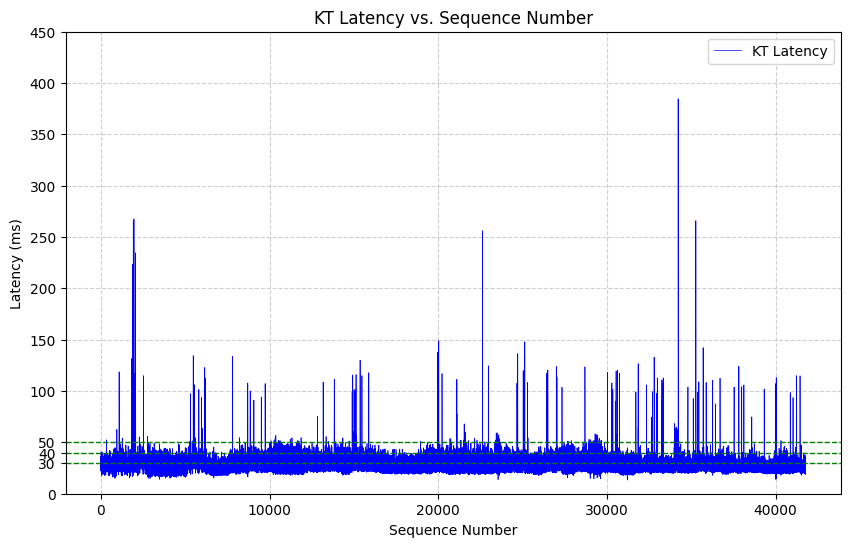

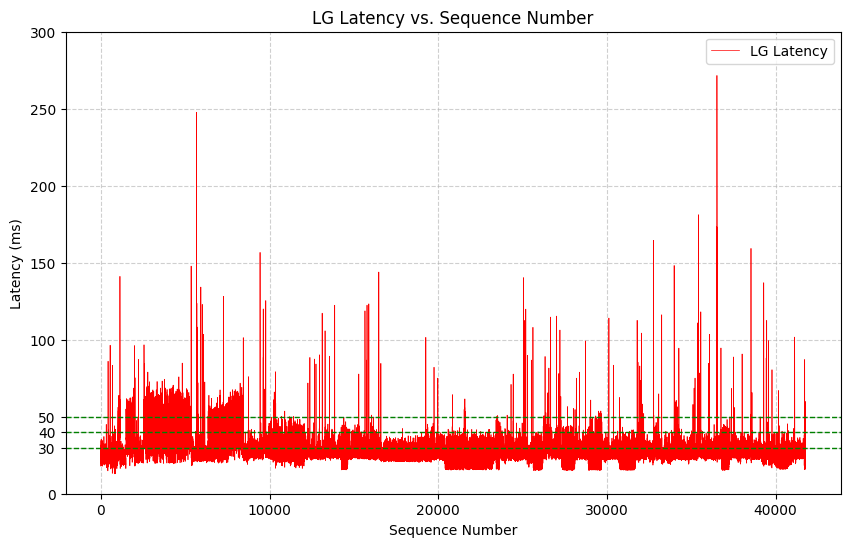

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# CSV ÌååÏùº ÏùΩÍ∏∞
kt_log_df = pd.read_csv(KT_LOG_FILEPATH, index_col=None)
lg_log_df = pd.read_csv(LG_LOG_FILEPATH, index_col=None)

# 'sequence_number'ÏôÄ 'network_latency_ms' Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂ú
kt_sequence_numbers = kt_log_df['sequence_number']
kt_latencies = kt_log_df['network_latency_ms']

lg_sequence_numbers = lg_log_df['sequence_number']
lg_latencies = lg_log_df['network_latency_ms']

# KT Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.figure(figsize=(10, 6))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.plot(kt_sequence_numbers, kt_latencies, label='KT Latency', color='blue', linestyle='-', linewidth=0.5)
plt.ylim(bottom=0)  # yÏ∂ïÏùò ÏµúÏÜåÍ∞íÏùÑ 0ÏúºÎ°ú ÏÑ§Ï†ï

# yÏ∂ïÏóê 30, 40, 50 Ï∂îÍ∞Ä
current_yticks = plt.yticks()[0]  # ÌòÑÏû¨ yÏ∂ïÏùò ÏúÑÏπò Í∞ÄÏ†∏Ïò§Í∏∞
new_yticks = list(current_yticks) + [30, 40, 50]  # 30, 40, 50 Ï∂îÍ∞Ä
new_yticks = sorted(set(new_yticks))  # Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Ï†ïÎ†¨
plt.yticks(new_yticks)  # ÏÉàÎ°úÏö¥ yÏ∂ï ÎùºÎ≤®Î°ú ÏóÖÎç∞Ïù¥Ìä∏

# yÏ∂ïÏù¥ 30, 40, 50Ïùº Îïå Ï¥àÎ°ùÏÉâ Í∞ÄÎ°úÏÑ† Ï∂îÍ∞Ä
highlight_values = [30, 40, 50]
for val in highlight_values:
    plt.axhline(y=val, color='green', linestyle='--', linewidth=1)  # yÏ∂ïÏóê ÎåÄÌïú Í∞ÄÎ°úÏÑ† Ï∂îÍ∞Ä

# KT Í∑∏ÎûòÌîÑ Î†àÏù¥Î∏î Ï∂îÍ∞Ä
plt.xlabel('Sequence Number')
plt.ylabel('Latency (ms)')
plt.title('KT Latency vs. Sequence Number')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Í∑∏ÎûòÌîÑ Ï†ÄÏû•
kt_graph_path = os.path.join(GRAPH_PATH, 'kt_latency.png')
plt.savefig(kt_graph_path, dpi=300, bbox_inches='tight')

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()

# LG Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.figure(figsize=(10, 6))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.plot(lg_sequence_numbers, lg_latencies, label='LG Latency', color='red', linestyle='-', linewidth=0.5)
plt.ylim(bottom=0)  # yÏ∂ïÏùò ÏµúÏÜåÍ∞íÏùÑ 0ÏúºÎ°ú ÏÑ§Ï†ï

# yÏ∂ïÏóê 30, 40, 50 Ï∂îÍ∞Ä
current_yticks = plt.yticks()[0]  # ÌòÑÏû¨ yÏ∂ïÏùò ÏúÑÏπò Í∞ÄÏ†∏Ïò§Í∏∞
new_yticks = list(current_yticks) + [30, 40, 50]  # 30, 40, 50 Ï∂îÍ∞Ä
new_yticks = sorted(set(new_yticks))  # Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Ï†ïÎ†¨
plt.yticks(new_yticks)  # ÏÉàÎ°úÏö¥ yÏ∂ï ÎùºÎ≤®Î°ú ÏóÖÎç∞Ïù¥Ìä∏

# yÏ∂ïÏù¥ 30, 40, 50Ïùº Îïå Ï¥àÎ°ùÏÉâ Í∞ÄÎ°úÏÑ† Ï∂îÍ∞Ä
for val in highlight_values:
    plt.axhline(y=val, color='green', linestyle='--', linewidth=1)  # yÏ∂ïÏóê ÎåÄÌïú Í∞ÄÎ°úÏÑ† Ï∂îÍ∞Ä

# LG Í∑∏ÎûòÌîÑ Î†àÏù¥Î∏î Ï∂îÍ∞Ä
plt.xlabel('Sequence Number')
plt.ylabel('Latency (ms)')
plt.title('LG Latency vs. Sequence Number')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Í∑∏ÎûòÌîÑ Ï†ÄÏû•
lg_graph_path = os.path.join(GRAPH_PATH, 'lg_latency.png')
plt.savefig(lg_graph_path, dpi=300, bbox_inches='tight')

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()


# plot loss

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ÏÑ§Ï†ïÎêú Í≤ΩÎ°ú Î∞è ÌååÏùºÎì§
file_names = ["kt_log.csv", "lg_log.csv", "combine_log.csv"]

# ÏÑ§Ï†ïÌï† delay thresholds
delay_thresholds = [20, 30, 40, 50, 100]

# Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Ìè¥Îçî
output_folder = GRAPH_PATH

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ± Ìï®Ïàò
def create_graph(file_path, delay_thresholds):
    # ÌååÏùº ÏùΩÍ∏∞
    df = pd.read_csv(file_path)
    file_name = os.path.basename(file_path).split('.')[0]

    for threshold in delay_thresholds:
        # ÏßÄÏó∞ ÏãúÍ∞Ñ ÎπÑÍµê: ÏûëÏúºÎ©¥ 1, ÌÅ¨Î©¥ 0
        df[f"latency_below_{threshold}"] = df["network_latency_ms"] <= threshold

        # Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
        plt.figure(figsize=(10, 6))
        plt.plot(df["sequence_number"], 
                 df[f"latency_below_{threshold}"], 
                 marker='o', 
                 linestyle='None',  # ÏÑ† Ï†úÍ±∞
                 markersize=0.1,      # ÎßàÏª§ ÌÅ¨Í∏∞ Ï°∞Ï†ï
                 label=f"Threshold: {threshold}ms")
        plt.xlabel("Sequence Number")
        plt.ylabel(f"Latency ‚â§ {threshold}ms (1: Yes, 0: No)")
        plt.title(f"Network Latency Comparison for {file_name} (Threshold {threshold}ms)")
        plt.legend()
        plt.grid()

        # Í∑∏ÎûòÌîÑ Ï†ÄÏû•
        output_path = os.path.join(output_folder, f"{file_name}_latency_{threshold}ms.png")
        plt.savefig(output_path)
        plt.close()
        print(f"Graph saved: {output_path}")

# Í∞Å ÌååÏùºÏóê ÎåÄÌï¥ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
for file_name in file_names:
    file_path = os.path.join(SERVER_FILEPATH, file_name)
    create_graph(file_path, delay_thresholds)

print("All graphs have been generated and saved.")


Graph saved: /home/songmu/multipath/server/logs/2024_12_10_16_45/graphs/kt_log_latency_20ms.png
Graph saved: /home/songmu/multipath/server/logs/2024_12_10_16_45/graphs/kt_log_latency_30ms.png
Graph saved: /home/songmu/multipath/server/logs/2024_12_10_16_45/graphs/kt_log_latency_40ms.png
Graph saved: /home/songmu/multipath/server/logs/2024_12_10_16_45/graphs/kt_log_latency_50ms.png
Graph saved: /home/songmu/multipath/server/logs/2024_12_10_16_45/graphs/kt_log_latency_100ms.png
Graph saved: /home/songmu/multipath/server/logs/2024_12_10_16_45/graphs/lg_log_latency_20ms.png
Graph saved: /home/songmu/multipath/server/logs/2024_12_10_16_45/graphs/lg_log_latency_30ms.png
Graph saved: /home/songmu/multipath/server/logs/2024_12_10_16_45/graphs/lg_log_latency_40ms.png
Graph saved: /home/songmu/multipath/server/logs/2024_12_10_16_45/graphs/lg_log_latency_50ms.png
Graph saved: /home/songmu/multipath/server/logs/2024_12_10_16_45/graphs/lg_log_latency_100ms.png
Graph saved: /home/songmu/multipath/se

## frame number ÏÉùÏÑ± (client file)

In [6]:
import os
import shutil

# ÏõêÎ≥∏ frames Ìè¥Îçî Í≤ΩÎ°ú
frames_folder = os.path.expanduser(f"{CLIENT_FILEPATH}frames")
# ÏÉàÎ°ú ÏÉùÏÑ±Ìï† frames_with_sequence Ìè¥Îçî Í≤ΩÎ°ú
destination_folder = os.path.expanduser(f"{CLIENT_FILEPATH}frames_with_sequence")

# frames_with_sequence Ìè¥ÎçîÍ∞Ä ÏóÜÏúºÎ©¥ ÏÉùÏÑ±
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# frames Ìè¥Îçî ÎÇ¥Ïùò ÌååÏùºÎì§ÏùÑ Í∞ÄÏ†∏Ïò¥
files = [f for f in os.listdir(frames_folder) if f.endswith(".png")]

# ÌååÏùºÎì§ÏùÑ ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
files.sort(key=lambda x: int(x.split('.')[0]))

sequence_number = 0
final_sequence_number = len(files) - 1 # 0Î∂ÄÌÑ∞ ÏãúÏûë

# ÌååÏùºÎì§ÏùÑ ÏàúÏÑúÎåÄÎ°ú Î≥µÏÇ¨ÌïòÎ©∞ Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
for file_name in files:
    if sequence_number <= final_sequence_number:
        timestamp = file_name.split('.')[0]
        new_file_name = f"{sequence_number}_{timestamp}.png"
        src_path = os.path.join(frames_folder, file_name)
        dst_path = os.path.join(destination_folder, new_file_name)
        shutil.copy(src_path, dst_path)
        sequence_number += 1

print("Files have been successfully copied and renamed.")


Files have been successfully copied and renamed.


### Message size <-> Network latency

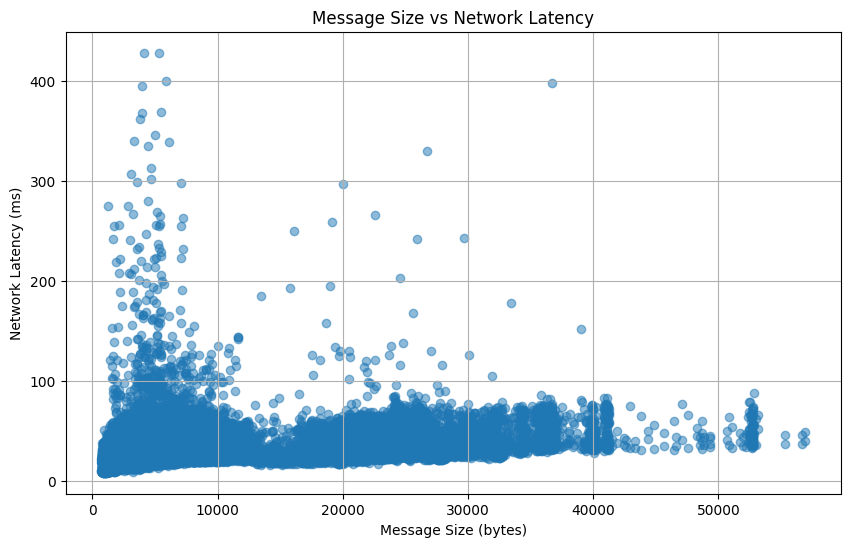

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os


def plot_message_size_vs_latency(kt_log_df, lg_log_df):
    # Combine the data frames
    combined_df = pd.concat([kt_log_df, lg_log_df], ignore_index=True)
    
    # Ensure the required columns exist
    if 'message_size' not in combined_df.columns or 'network_latency_ms' not in combined_df.columns:
        print("Required columns are missing in the data frames.")
        return
    
    # Extract the required columns
    message_sizes = combined_df['message_size']
    latencies = combined_df['network_latency_ms']
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(message_sizes, latencies, alpha=0.5)
    plt.title('Message Size vs Network Latency')
    plt.xlabel('Message Size (bytes)')
    plt.ylabel('Network Latency (ms)')
    plt.grid(True)
    plt.savefig(f'{GRAPH_PATH}/message_size_vs_latency.png')
    plt.show()


plot_message_size_vs_latency(kt_log_df, lg_log_df)
